# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url + "appid=" + weather_api_key + "&q=" + city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
    #print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed'] 
        city_country =city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | autun
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | tenosique
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | lerwick
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | touros
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | rio preto da eva
Processing Record 17 of Set 1 | rongelap
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | island harbour
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | waitangi
Processing Record 22 o

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.index +=1

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,albany,42.6001,-73.9662,4.40,56,53,3.58,US,1711751103
2,autun,46.9500,4.3000,13.21,51,100,4.24,FR,1711751103
3,port-aux-francais,-49.3500,70.2167,8.17,97,100,11.49,TF,1711751103
4,grytviken,-54.2811,-36.5092,4.79,69,100,5.75,GS,1711751104
5,utrik,11.2278,169.8474,26.82,74,100,7.70,MH,1711751104


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,4.40,56,53,3.58,US,1711751103
2,autun,46.9500,4.3000,13.21,51,100,4.24,FR,1711751103
3,port-aux-francais,-49.3500,70.2167,8.17,97,100,11.49,TF,1711751103
4,grytviken,-54.2811,-36.5092,4.79,69,100,5.75,GS,1711751104
5,utrik,11.2278,169.8474,26.82,74,100,7.70,MH,1711751104


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

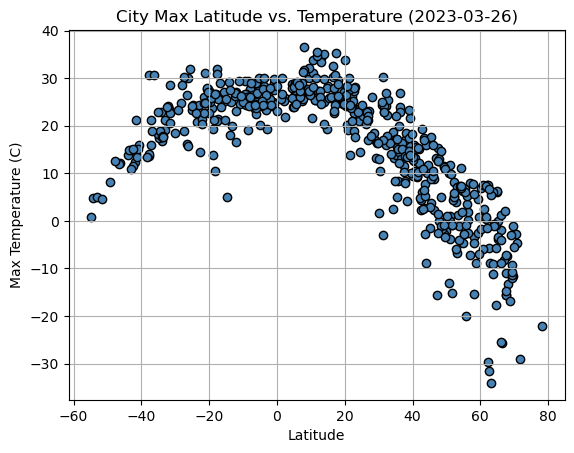

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c="steelblue",linewidths=1, ec="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-26)")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

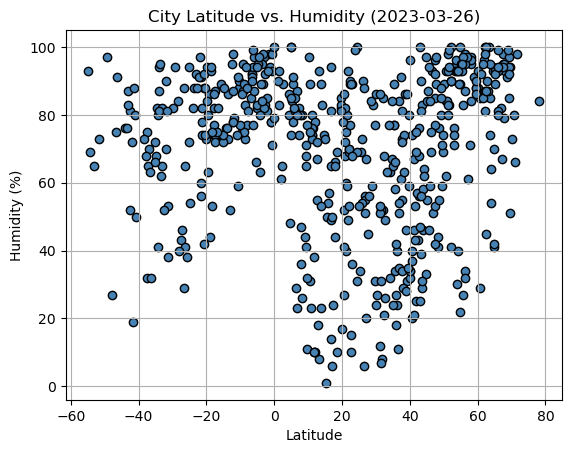

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c="steelblue",linewidths=1, ec="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-26)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

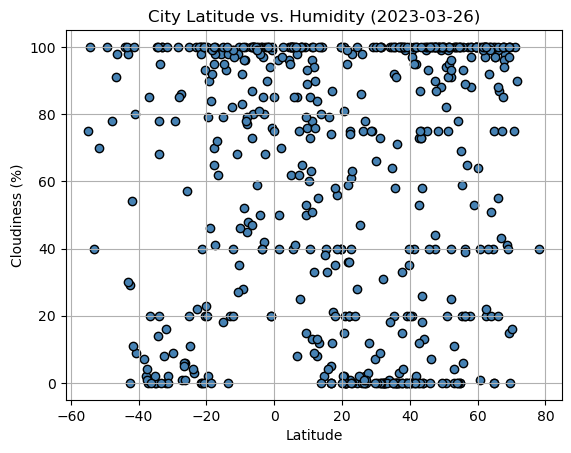

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c="steelblue",linewidths=1, ec="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Humidity (2023-03-26)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

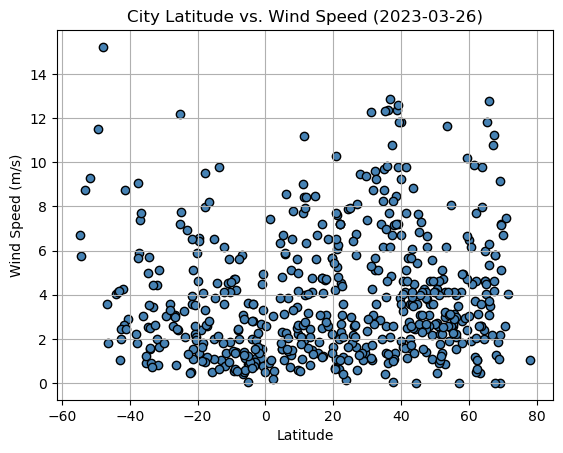

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],c="steelblue",linewidths=1, ec="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-26)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
    

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,albany,42.6001,-73.9662,4.40,56,53,3.58,US,1711751103
2,autun,46.9500,4.3000,13.21,51,100,4.24,FR,1711751103
5,utrik,11.2278,169.8474,26.82,74,100,7.70,MH,1711751104
7,petropavlovsk-kamchatsky,53.0452,158.6483,-6.67,76,0,3.00,RU,1711751105
8,bilibino,68.0546,166.4372,-13.21,93,98,1.25,RU,1711751105


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,8.17,97,100,11.49,TF,1711751103
4,grytviken,-54.2811,-36.5092,4.79,69,100,5.75,GS,1711751104
6,edinburgh of the seven seas,-37.0676,-12.3116,15.97,70,85,7.39,SH,1711751105
10,bredasdorp,-34.5322,20.0403,17.85,82,100,4.98,ZA,1711751106
12,port elizabeth,-33.9180,25.5701,18.94,94,20,1.54,ZA,1711751107


###  Temperature vs. Latitude Linear Regression Plot

The r value is:-0.8765163941139471


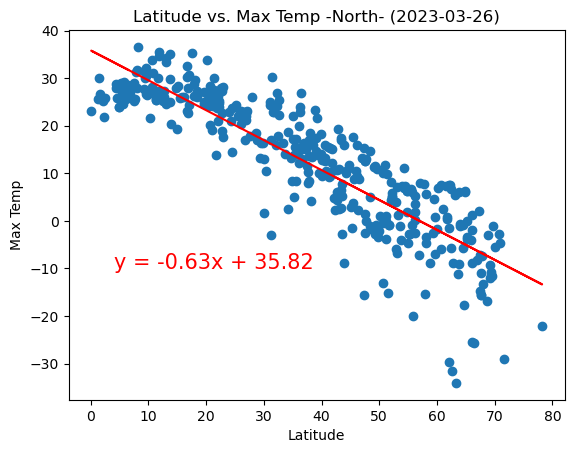

In [17]:
# Linear regression on Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Max Temp"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(4,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp -North- (2023-03-26)")
print(f"The r value is:{rvalue}")

The r value is:0.6716285338491116


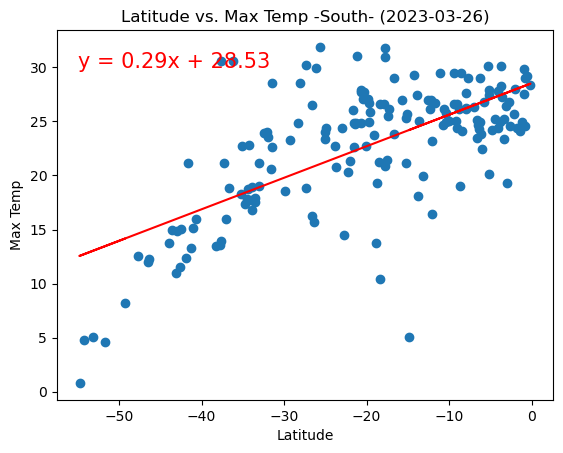

In [18]:
# Linear regression on Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Max Temp"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp -South- (2023-03-26)")
print(f"The r value is:{rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is:0.29340715944889195


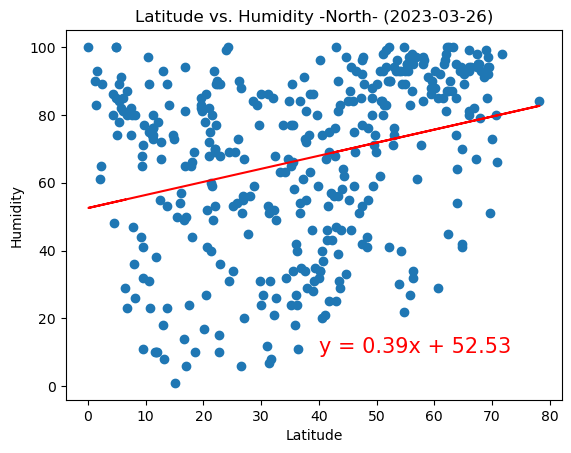

In [19]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Humidity"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity -North- (2023-03-26)")
print(f"The r value is:{rvalue}")

The r value is:0.38824802274072345


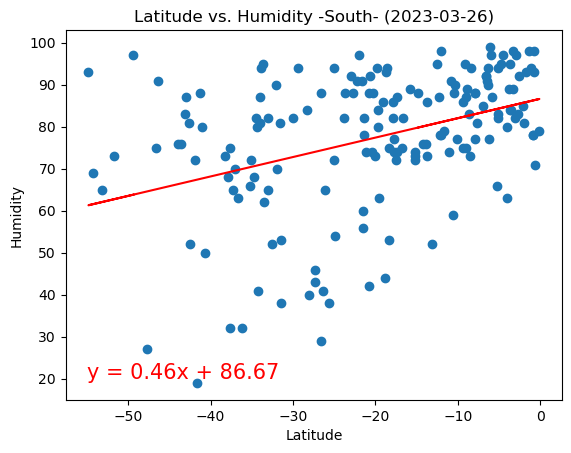

In [20]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Humidity"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity -South- (2023-03-26)")
print(f"The r value is:{rvalue}")

**Discussion about the linear relationship:** Latitude and Humidity is weak correlations in both Southern Hemisphere and Northern Hemisphere.  Correlations in Northen hemisphere is slightly moderate. 

### Cloudiness vs. Latitude Linear Regression Plot

The r value is:0.13403593352614704


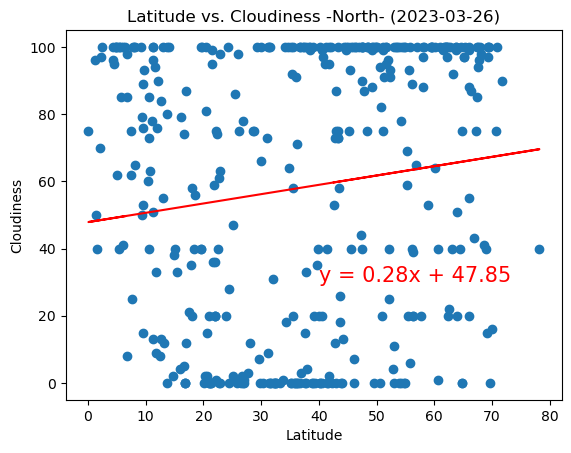

In [21]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Cloudiness"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness -North- (2023-03-26)")
print(f"The r value is:{rvalue}")

The r value is:0.28883361876485336


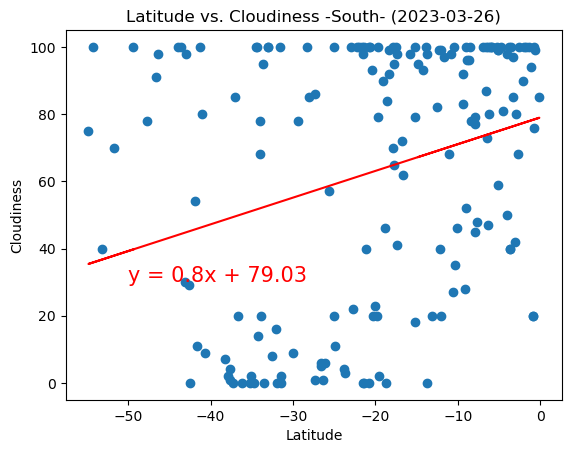

In [22]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Cloudiness"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness -South- (2023-03-26)")
print(f"The r value is:{rvalue}")

**Discussion about the linear relationship:** Latitude and Cloudiness is weak correlations in both Southern Hemisphere and Northern Hemishpere.  

### Wind Speed vs. Latitude Linear Regression Plot

The r value is:0.048587308133929606


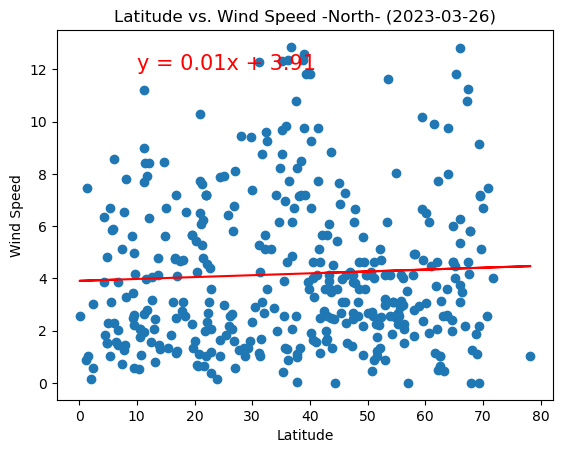

In [23]:
# Northern Hemisphere
x_axis=northern_hemi_df["Lat"]
y_axis=northern_hemi_df["Wind Speed"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed -North- (2023-03-26)")
print(f"The r value is:{rvalue}")

The r value is:-0.37823721160185597


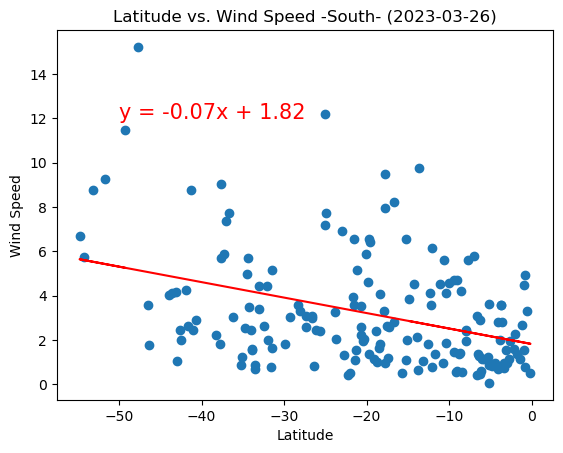

In [24]:
# Southern Hemisphere
x_axis=southern_hemi_df["Lat"]
y_axis=southern_hemi_df["Wind Speed"]

plt.scatter(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed -South- (2023-03-26)")
print(f"The r value is:{rvalue}")

**Discussion about the linear relationship:** Latitude and Wind Speed in Southern Hemisphere is moderate negative correlations, while that of the Northern Hemisphere is low correlation.